## Bitcoin Price Prediction with Machine Learning
In this Data Science Project we will predict Bitcoin Price - Machine Learning model Support Vector Machines(Regression).

#### Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 

#### Importing the dataset

In [2]:
df = pd.read_csv("bitcoin.csv")
df.head()

,Date,Price
0,5/23/2019,7881.846680
1,5/24/2019,7987.371582
2,5/25/2019,8052.543945
3,5/26/2019,8673.215820
4,5/27/2019,8805.778320


In [3]:
# Remove the date column
df.drop(['Date'], 1, inplace=True)

In [4]:
df

,Price
0,7881.846680
1,7987.371582
2,8052.543945
3,8673.215820
4,8805.778320
...,...
362,9729.038086
363,9522.981445
364,9081.761719
365,9182.577148


#### Now lets create a variable to predict ‘n’ days out there in the future

In [7]:
predictionDays = 30
# Create another column shifted 'n'  units up
df['Prediction'] = df[['Price']].shift(-predictionDays)
# show the first 5 rows
df.head()

,Price,Prediction
0,7881.846680,10701.69141
1,7987.371582,10855.37109
2,8052.543945,11011.10254
3,8673.215820,11790.91699
4,8805.778320,13016.23145


In [8]:
# To Show last 5 rows of new data set

df.tail()

,Price,Prediction
362,9729.038086,NaN
363,9522.981445,NaN
364,9081.761719,NaN
365,9182.577148,NaN
366,9180.045898,NaN


In [23]:
# Create the independent dataset
# Here we will convert the data frame into a numpy array and drop the prediction column
x = np.array(df.drop(['Prediction'],1))
# Remove the last 'n' rows where 'n' is the predictionDays
x = x[:len(df)-predictionDays]
print(x)

[[ 7881.84668 ]
 [ 7987.371582]
 [ 8052.543945]
 [ 8673.21582 ]
 [ 8805.77832 ]
 [ 8719.961914]
 [ 8659.487305]
 [ 8319.472656]
 [ 8574.501953]
 [ 8564.016602]
 [ 8742.958008]
 [ 8208.995117]
 [ 7707.770996]
 [ 7824.231445]
 [ 7822.023438]
 [ 8043.951172]
 [ 7954.12793 ]
 [ 7688.077148]
 [ 8000.32959 ]
 [ 7927.714355]
 [ 8145.857422]
 [ 8230.923828]
 [ 8693.833008]
 [ 8838.375   ]
 [ 8994.488281]
 [ 9320.352539]
 [ 9081.762695]
 [ 9273.521484]
 [ 9527.160156]
 [10144.55664 ]
 [10701.69141 ]
 [10855.37109 ]
 [11011.10254 ]
 [11790.91699 ]
 [13016.23145 ]
 [11182.80664 ]
 [12407.33203 ]
 [11959.37109 ]
 [10817.15527 ]
 [10583.13477 ]
 [10801.67773 ]
 [11961.26953 ]
 [11215.4375  ]
 [10978.45996 ]
 [11208.55078 ]
 [11450.84668 ]
 [12285.95801 ]
 [12573.8125  ]
 [12156.5127  ]
 [11358.66211 ]
 [11815.98633 ]
 [11392.37891 ]
 [10256.05859 ]
 [10895.08984 ]
 [ 9477.641602]
 [ 9693.802734]
 [10666.48242 ]
 [10530.73242 ]
 [10767.13965 ]
 [10599.10547 ]
 [10343.10645 ]
 [ 9900.767578]
 [ 9811.

In [24]:
# Create the dependent data set
# convert the data frame into a numpy array
y = np.array(df['Prediction'])
# Get all the values except last 'n' rows
y = y[:-predictionDays]
print(y)

[10701.69141  10855.37109  11011.10254  11790.91699  13016.23145
 11182.80664  12407.33203  11959.37109  10817.15527  10583.13477
 10801.67773  11961.26953  11215.4375   10978.45996  11208.55078
 11450.84668  12285.95801  12573.8125   12156.5127   11358.66211
 11815.98633  11392.37891  10256.05859  10895.08984   9477.641602
  9693.802734 10666.48242  10530.73242  10767.13965  10599.10547
 10343.10645   9900.767578  9811.925781  9911.841797  9870.303711
  9477.677734  9552.860352  9519.145508  9607.423828 10085.62793
 10399.66895  10518.17481  10821.72656  10970.18457  11805.65332
 11478.16895  11941.96875  11966.40723  11862.93652  11354.02441
 11523.5791   11382.61621  10895.83008  10051.7041   10311.5459
 10374.33887  10231.74414  10345.81055  10916.05371  10763.23242
 10138.04981  10131.05566  10407.96484  10159.96094  10138.51758
 10370.82031  10185.5       9754.422852  9510.200195  9598.173828
  9630.664063  9757.970703 10346.76074  10623.54004  10594.49316
 10575.5332   10353.302

#### Feature Scaling

In [42]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [43]:
print(X)

[[-0.59574937]
 [-0.52698463]
 [-0.48451541]
 [-0.0800579 ]
 [ 0.00632575]
 [-0.04959605]
 [-0.08900401]
 [-0.31057274]
 [-0.14438426]
 [-0.15121698]
 [-0.03461077]
 [-0.38256484]
 [-0.70918486]
 [-0.63329403]
 [-0.63473286]
 [-0.49011484]
 [-0.54864768]
 [-0.72201825]
 [-0.51854061]
 [-0.56585994]
 [-0.42370818]
 [-0.36827511]
 [-0.06662282]
 [ 0.0275672 ]
 [ 0.12929758]
 [ 0.34164529]
 [ 0.18616949]
 [ 0.31112808]
 [ 0.47641036]
 [ 0.87873348]
 [ 1.24178738]
 [ 1.34193192]
 [ 1.44341349]
 [ 1.9515754 ]
 [ 2.75004502]
 [ 1.55530355]
 [ 2.35325897]
 [ 2.06134762]
 [ 1.31702878]
 [ 1.16453058]
 [ 1.30694293]
 [ 2.06258473]
 [ 1.57656727]
 [ 1.42214212]
 [ 1.57207958]
 [ 1.7299704 ]
 [ 2.27416624]
 [ 2.46174508]
 [ 2.18981389]
 [ 1.66989882]
 [ 1.96791171]
 [ 1.69187019]
 [ 0.95139313]
 [ 1.36781443]
 [ 0.44414186]
 [ 0.58500211]
 [ 1.21884363]
 [ 1.13038287]
 [ 1.28443637]
 [ 1.1749378 ]
 [ 1.00811741]
 [ 0.71986964]
 [ 0.66197636]
 [ 0.7270861 ]
 [ 0.70001803]
 [ 0.44416541]
 [ 0.49315

In [44]:
print(y)

[[ 1.2126955 ]
 [ 1.31279177]
 [ 1.41422442]
 [ 1.92214138]
 [ 2.7202261 ]
 [ 1.52606054]
 [ 2.32363132]
 [ 2.03186068]
 [ 1.28790064]
 [ 1.13547595]
 [ 1.27781965]
 [ 2.03309719]
 [ 1.54731402]
 [ 1.39296331]
 [ 1.54282849]
 [ 1.70064321]
 [ 2.24457671]
 [ 2.43206513]
 [ 2.16026503]
 [ 1.64060058]
 [ 1.93846981]
 [ 1.66256136]
 [ 0.92244124]
 [ 1.33866181]
 [ 0.41543449]
 [ 0.55622684]
 [ 1.18976281]
 [ 1.10134469]
 [ 1.25532394]
 [ 1.14587815]
 [ 0.97913817]
 [ 0.69102936]
 [ 0.63316398]
 [ 0.69824234]
 [ 0.67118731]
 [ 0.41545802]
 [ 0.46442676]
 [ 0.44246725]
 [ 0.49996562]
 [ 0.81143455]
 [ 1.01597905]
 [ 1.09316554]
 [ 1.29087806]
 [ 1.3875733 ]
 [ 1.9317396 ]
 [ 1.71843903]
 [ 2.02052601]
 [ 2.03644353]
 [ 1.9690499 ]
 [ 1.63757991]
 [ 1.74801605]
 [ 1.65620262]
 [ 1.33914395]
 [ 0.78933892]
 [ 0.95858182]
 [ 0.9994808 ]
 [ 0.9066045 ]
 [ 0.98089943]
 [ 1.35231622]
 [ 1.25277904]
 [ 0.84557852]
 [ 0.84102302]
 [ 1.02138242]
 [ 0.85984991]
 [ 0.84588319]
 [ 0.99718905]
 [ 0.87648

#### Training the SVR model on the whole dataset

In [45]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVR()

In [48]:
svr_rbf_confidence = svr_rbf.score(X_test,y_test)
print('SVR_RBF accuracy :',svr_rbf_confidence)

SVR_RBF accuracy : 0.3195028415223029


#### Predicting a new result

In [46]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[7881.846680]])))

array([9140.39666063])

#### Visualising the SVR results

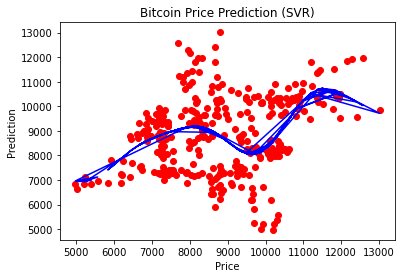

In [47]:
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title('Bitcoin Price Prediction (SVR)')
plt.xlabel('Price')
plt.ylabel('Prediction')
plt.show()

#### Splitting the dataset into the Training set and Test set

In [25]:
# Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, test_size = 0.2)
# set the predictionDays array equal to last 30 rows from the original data set
predictionDays_array = np.array(df.drop(['Prediction'],1))[-predictionDays:]
print(predictionDays_array)

[[7550.900879]
 [7569.936035]
 [7679.867188]
 [7795.601074]
 [7807.058594]
 [8801.038086]
 [8658.553711]
 [8864.766602]
 [8988.59668 ]
 [8897.46875 ]
 [8912.654297]
 [9003.070313]
 [9268.761719]
 [9951.518555]
 [9842.666016]
 [9593.896484]
 [8756.430664]
 [8601.795898]
 [8804.477539]
 [9269.987305]
 [9733.72168 ]
 [9328.197266]
 [9377.013672]
 [9670.739258]
 [9726.575195]
 [9729.038086]
 [9522.981445]
 [9081.761719]
 [9182.577148]
 [9180.045898]]


In [18]:
# set the predictionDays array equal to last 30 rows from the original data set
predictionDays_array = np.array(df.drop(['Prediction'],1))[-predictionDays:]
print(predictionDays_array)

[[7550.900879]
 [7569.936035]
 [7679.867188]
 [7795.601074]
 [7807.058594]
 [8801.038086]
 [8658.553711]
 [8864.766602]
 [8988.59668 ]
 [8897.46875 ]
 [8912.654297]
 [9003.070313]
 [9268.761719]
 [9951.518555]
 [9842.666016]
 [9593.896484]
 [8756.430664]
 [8601.795898]
 [8804.477539]
 [9269.987305]
 [9733.72168 ]
 [9328.197266]
 [9377.013672]
 [9670.739258]
 [9726.575195]
 [9729.038086]
 [9522.981445]
 [9081.761719]
 [9182.577148]
 [9180.045898]]


#### Training the SVR model on the whole dataset

In [33]:
from sklearn.svm import SVR
# Create and Train the Support Vector Machine (Regression) using radial basis function
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.00001)
svr_rbf.fit(xtrain, ytrain)

SVR(C=1000.0, gamma=1e-05)

#### Test the model

In [34]:
svr_rbf_confidence = svr_rbf.score(xtest,ytest)
print('SVR_RBF accuracy :',svr_rbf_confidence)

SVR_RBF accuracy : 0.20630272215714263


In [35]:
# print the predicted values
svm_prediction = svr_rbf.predict(xtest)
print(svm_prediction)
print()
print(ytest)

[ 9524.19338556  8495.69460182 10282.28915683  9051.0747764
  7808.09747438  8946.78450582  8816.77547564  8390.42938517
  8622.88808902  8486.68197277  7916.53459606  7758.92499452
  8058.01537207  7977.92014597  9312.70865666  8518.36901412
  8408.80833524  8686.69552813  9114.48741071  7997.7559326
  8599.95801015 10405.57758502  7939.61025958  8007.46272377
  8730.02094099 10333.06533265  8396.59637202  9824.42480995
  8258.73547575  9248.52017914  9952.43265443  8685.21485156
  7785.11499382  9902.44974986  8046.28107621  8768.51362484
  8800.23852739  8044.86688285 10078.29117751  8171.82927652
  8748.73089872  8015.16285442  8014.15780034 10088.84806303
  8200.77977835  8355.50020376  8506.64372628  8005.26391753
  8055.50316546  8724.43193953  9238.45716438  9826.881394
 10083.28840342  8276.90303868  8950.8913155   7887.95295027
  7905.18911771  9687.15790186  8727.83924108  8214.3203079
  8308.19849587  8648.53190212  7847.29974971  9134.67115725
  9092.28911239  7986.1655382